In [32]:
#İREM DEMİR 69563
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.stats as stats
import math

In [33]:
#read given data
data_set = np.genfromtxt("hw07_data_set.csv", delimiter = ",")
initial_centroids = np.genfromtxt("hw07_initial_centroids.csv", delimiter = ",")
X = data_set
D = X.shape[1]

#given parameters
class_means = np.array([[+2.5, +2.5],
                        [-2.5, +2.5],
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [0, 0]])  
class_deviations = np.array([[[+0.8, -0.6], [-0.6, +0.8]],
                             [[+0.8, +0.6], [+0.6, +0.8]],
                             [[+0.8, -0.6], [-0.6, +0.8]],
                             [[+0.8, +0.6], [+0.6, +0.8]],
                             [[+1.6, 0], [0, +1.6]]]) 

In [34]:
def update_memberships(centroids, X, K):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)    
    one_K_coding = []
    for member in memberships:
        k_code = np.zeros(K)
        k_code[member] = 1
        one_K_coding.append(k_code)
    return memberships, one_K_coding
def update_centroids(memberships, X):
    # update centroids
    centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

## EM Algorithm

In [35]:
def em(h,mu,covs,ps,X,K):
    #E-Step recalculate h
    h = h_calculator(mu,covs,ps,X,K)
    
    #M-step recalculate means,covs,priors
    mu = means(h, X, K)
    covs = covariances(X, mu,h, K)
    ps = priors(X, h, K)
    return h,mu,covs,ps
        

## E-Step helper function

In [36]:
def h_calculator(mu,covs,priors,X,K):
    N = X.shape[0]
    for k in range(K):
        for i in range(N):
            mult_gaussian = stats.multivariate_normal.pdf(X[i],np.reshape(mu[k], (2,)), covs[k])
            h[i][k] = priors[k] * mult_gaussian
            h[i][k] /= np.sum(h, axis=1)[i]
    return np.array(h)

## M-Step helper functions

In [37]:
def covariances(X, mu,h, K):
    covs = []
    for k in range(K):
        mu_k = mu[k]
        h_k = np.sum(h, axis = 0)[k]
        summ = np.sum([h[i][k]*np.matmul(np.transpose((np.reshape(X[i],(1,D))-mu_k)), (np.reshape(X[i],(1,D))-mu_k)) for i in range (X.shape[0])], axis=0)
        cov = summ /h_k
        covs.append(cov)
    return np.array(covs)
def means(h, X, K):
    means = []
    for k in range (K):
        summ = np.reshape(np.array(np.sum([h[i][k]*X[i] for i in range(X.shape[0])], axis = 0)), (1,D))
        h_k = np.sum(h, axis = 0)[k]
        means.append(summ/h_k)
    return np.array(means)
        
    
def priors(X, h, K):
    ps = []
    N = X.shape[0]
    for k in range(K):
        h_k = np.sum(h, axis = 0)[k]
        ps.append(h_k/N)
    return ps
        

In [38]:
#initial parameters
K = 5
initial_memberships, one_K_coding= update_memberships(np.reshape(initial_centroids, (K,D)), X, K)
h = one_K_coding
mu = means(h,X,K)
initial_covs = covariances(X, mu,h, K)
covs = initial_covs
ps = priors(X, h, K)
iterations = 100
for i in range(iterations):
    h,mu,covs,ps = em(h, mu,covs,ps,X,K)

memberships, one_K_coding= update_memberships(np.reshape(mu, (K,D)), X, K)
mu

array([[[-2.51183872, -2.63850006]],

       [[ 1.25717981,  3.72638942]],

       [[ 2.56165732, -2.5704365 ]],

       [[ 0.81795529,  0.61851477]],

       [[-2.4395176 ,  2.48147297]]])

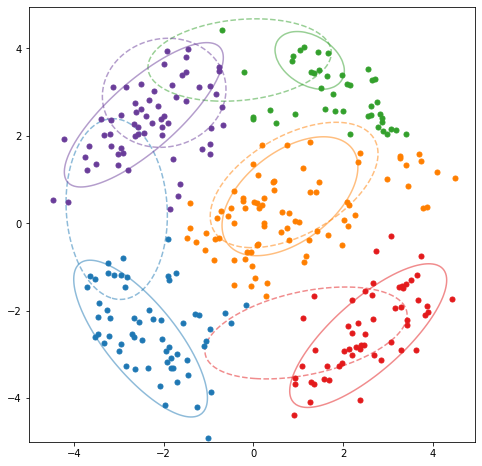

In [39]:
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

plt.figure(figsize=(8, 8))
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])

x1_interval = np.arange(-5, +5, 0.05)
x2_interval = np.arange(-5, +5, 0.05)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
coords = np.empty(x1_grid.shape + (2,))                
coords[:, :, 0] = x1_grid
coords[:, :, 1] = x2_grid 

dens1 = stats.multivariate_normal.pdf(coords,initial_centroids[0], initial_covs[0])
dens2 = stats.multivariate_normal.pdf(coords,initial_centroids[1], initial_covs[1]) 
dens3 = stats.multivariate_normal.pdf(coords,initial_centroids[2], initial_covs[2]) 
dens4 = stats.multivariate_normal.pdf(coords,initial_centroids[3], initial_covs[3]) 
dens5 = stats.multivariate_normal.pdf(coords,initial_centroids[4], initial_covs[4])

plt.contour(x1_grid, x2_grid,dens1, 1, colors=cluster_colors[0],levels=[0.05] ,alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens2, 1, colors=cluster_colors[1]  ,levels=[0.05],alpha = 0.5,linestyles='dashed')
plt.contour(x1_grid, x2_grid,dens3, 1, colors=cluster_colors[2]  ,levels=[0.05],alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens4, 1, colors=cluster_colors[3] ,levels=[0.05],alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens5, 1, colors=cluster_colors[4]  ,levels=[0.05],alpha = 0.5,linestyles='dashed')  


dens1f = stats.multivariate_normal.pdf(coords,np.reshape(mu[0], (2,)), covs[0])
dens2f = stats.multivariate_normal.pdf(coords,np.reshape(mu[1], (2,)), covs[1]) 
dens3f = stats.multivariate_normal.pdf(coords,np.reshape(mu[2], (2,)), covs[2]) 
dens4f = stats.multivariate_normal.pdf(coords,np.reshape(mu[3], (2,)), covs[3]) 
dens5f = stats.multivariate_normal.pdf(coords,np.reshape(mu[4], (2,)), covs[4])

plt.contour(x1_grid, x2_grid,dens1f, 1, colors=cluster_colors[0],levels=[0.05] ,alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens2f, 1, colors=cluster_colors[1]  ,levels=[0.05],alpha = 0.5)
plt.contour(x1_grid, x2_grid,dens3f, 1, colors=cluster_colors[2]  ,levels=[0.05],alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens4f, 1, colors=cluster_colors[3] ,levels=[0.05],alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens5f, 1, colors=cluster_colors[4]  ,levels=[0.05],alpha = 0.5)  





In [40]:
#initial parameters
K = 5
initial_memberships, one_K_coding= update_memberships(np.reshape(class_means, (K,D)), X, K)
h = one_K_coding
mu = class_means
initial_covs = class_deviations
covs = initial_covs
ps = np.array([1/6,1/6,1/6,1/6,2/6])
iterations = 100
for i in range(iterations):
    h,mu,covs,ps = em(h, mu,covs,ps,X,K)

memberships, one_K_coding= update_memberships(np.reshape(mu, (K,D)), X, K)
mu

array([[[ 2.5055979 ,  2.50908153]],

       [[-2.42371167,  2.48989363]],

       [[-2.49468425, -2.56799706]],

       [[ 2.56838136, -2.55778854]],

       [[ 0.08333418,  0.10491127]]])

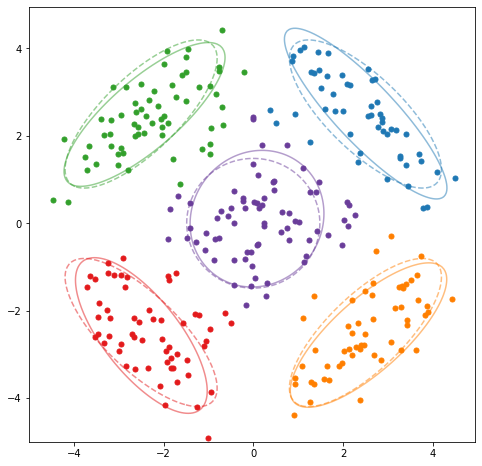

In [41]:
cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])

plt.figure(figsize=(8, 8))
for c in range(K):
    plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])

x1_interval = np.arange(-5, +5, 0.05)
x2_interval = np.arange(-5, +5, 0.05)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
coords = np.empty(x1_grid.shape + (2,))                
coords[:, :, 0] = x1_grid
coords[:, :, 1] = x2_grid 

dens1 = stats.multivariate_normal.pdf(coords,class_means[0], class_deviations[0])
dens2 = stats.multivariate_normal.pdf(coords,class_means[1], class_deviations[1]) 
dens3 = stats.multivariate_normal.pdf(coords,class_means[2], class_deviations[2]) 
dens4 = stats.multivariate_normal.pdf(coords,class_means[3], class_deviations[3]) 
dens5 = stats.multivariate_normal.pdf(coords,class_means[4], class_deviations[4])

plt.contour(x1_grid, x2_grid,dens1, 1, colors=cluster_colors[0],levels=[0.05] ,alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens2, 1, colors=cluster_colors[1]  ,levels=[0.05],alpha = 0.5,linestyles='dashed')
plt.contour(x1_grid, x2_grid,dens3, 1, colors=cluster_colors[2]  ,levels=[0.05],alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens4, 1, colors=cluster_colors[3] ,levels=[0.05],alpha = 0.5,linestyles='dashed') 
plt.contour(x1_grid, x2_grid,dens5, 1, colors=cluster_colors[4]  ,levels=[0.05],alpha = 0.5,linestyles='dashed')  


dens1f = stats.multivariate_normal.pdf(coords,np.reshape(mu[0], (2,)), covs[0])
dens2f = stats.multivariate_normal.pdf(coords,np.reshape(mu[1], (2,)), covs[1]) 
dens3f = stats.multivariate_normal.pdf(coords,np.reshape(mu[2], (2,)), covs[2]) 
dens4f = stats.multivariate_normal.pdf(coords,np.reshape(mu[3], (2,)), covs[3]) 
dens5f = stats.multivariate_normal.pdf(coords,np.reshape(mu[4], (2,)), covs[4])

plt.contour(x1_grid, x2_grid,dens1f, 1, colors=cluster_colors[0],levels=[0.05] ,alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens2f, 1, colors=cluster_colors[1]  ,levels=[0.05],alpha = 0.5)
plt.contour(x1_grid, x2_grid,dens3f, 1, colors=cluster_colors[2]  ,levels=[0.05],alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens4f, 1, colors=cluster_colors[3] ,levels=[0.05],alpha = 0.5) 
plt.contour(x1_grid, x2_grid,dens5f, 1, colors=cluster_colors[4]  ,levels=[0.05],alpha = 0.5)  









